In [10]:
# SpatialPy 2d-like system model of bi-stable biochemical systems like those presented in 
# https://pubmed.ncbi.nlm.nih.gov/17051695/

In [11]:
import os
import sys
from collections import OrderedDict
sys.path.append("../..")
import spatialpy
spatialpy.__file__
import matplotlib.pyplot as plt
import numpy
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
class All(spatialpy.Geometry):
    def inside(self, x, on_boundary):
        return True

In [13]:
class bistableBiochemElfEhrenberg(spatialpy.Model):

   def __init__(self, model_name="bistableBiochemElfEhrenberg"):
        spatialpy.Model.__init__(self, model_name)

        diff_const = 0.1
        EA = spatialpy.Species(name="EA", diffusion_constant=diff_const)
        EB = spatialpy.Species(name="EB", diffusion_constant=diff_const)
        EAB = spatialpy.Species(name="EAB", diffusion_constant=diff_const)
        EBA = spatialpy.Species(name="EBA", diffusion_constant=diff_const)
        EAB2 = spatialpy.Species(name="EAB2", diffusion_constant=diff_const)
        EBA2 = spatialpy.Species(name="EBA2", diffusion_constant=diff_const)
        A = spatialpy.Species(name="A", diffusion_constant=diff_const)
        B = spatialpy.Species(name="B", diffusion_constant=diff_const)
        self.add_species([EA, EB, EAB, EBA, EAB2, EBA2, A, B])

        self.mesh = spatialpy.Mesh.create_2D_domain(nx=35, ny=35, xlim=[0, 100], ylim=[0, 100], fixed=True)

        self.set_type(All(), 1)

        K1 = spatialpy.Parameter("K1", expression=150.0)
        Ka = spatialpy.Parameter("Ka", expression=1.2e8)
        Kd = spatialpy.Parameter("Kd", expression=10.0)
        K4 = spatialpy.Parameter("K4", expression=6.0)
        self.add_parameter([K1, Ka, Kd, K4])

        R1 = spatialpy.Reaction(reactants={EA:1}, products={EA:1, A:1}, rate=K1)
        R2 = spatialpy.Reaction(reactants={EB:1}, products={EB:1, B:1}, rate=K1)
        R3 = spatialpy.Reaction(reactants={EA:1, B:1}, products={EAB:1}, rate=Ka)
        R4 = spatialpy.Reaction(reactants={EAB:1}, products={EA:1, B:1}, rate=Kd)
        R5 = spatialpy.Reaction(reactants={EAB:1, B:1}, products={EAB2:1}, rate=Ka)
        R6 = spatialpy.Reaction(reactants={EAB2:1}, products={EAB:1, B:1}, rate=Kd)
        R7 = spatialpy.Reaction(reactants={EB:1, A:1}, products={EBA:1}, rate=Ka)
        R8 = spatialpy.Reaction(reactants={EBA:1}, products={EB:1, A:1}, rate=Kd)
        R9 = spatialpy.Reaction(reactants={EBA:1, A:1}, products={EBA2:1}, rate=Ka)
        R10 = spatialpy.Reaction(reactants={EBA2:1}, products={EBA:1, A:1}, rate=Kd)
        R11 = spatialpy.Reaction(reactants={B:1}, products=None, rate=K4)
        R12 = spatialpy.Reaction(reactants={A:1}, products=None, rate=K4)
        self.add_reaction([R1, R2, R3, R4, R5, R6, R7, R8, R9, R10, R11, R12])

        self.add_initial_condition(spatialpy.ScatterInitialCondition(EA, 200, [1]))
        self.add_initial_condition(spatialpy.ScatterInitialCondition(EB, 200, [1]))

        self.staticDomain = True

        self.timespan(range(0,10))

In [14]:
model = bistableBiochemElfEhrenberg()

In [15]:
from spatialpy import Solver
sol = Solver(model, debug_level=0)
%time sol.compile()

CPU times: user 6.61 s, sys: 8.56 ms, total: 6.62 s
Wall time: 9.21 s


In [16]:
%time result = sol.run()

CPU times: user 37.7 ms, sys: 8.72 ms, total: 46.5 ms
Wall time: 27min 25s


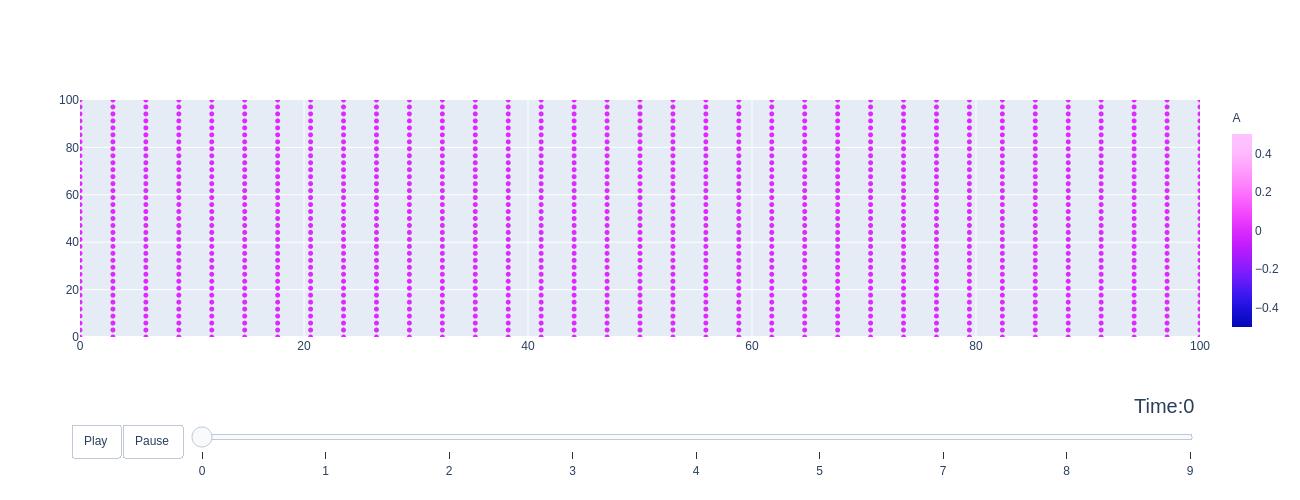

In [17]:
result.plot_species("A", t_ndx_list=[0,1,2,3,4,5,7,8,9], animated=True)

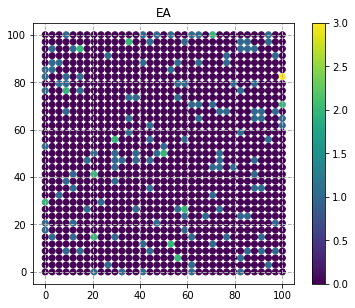

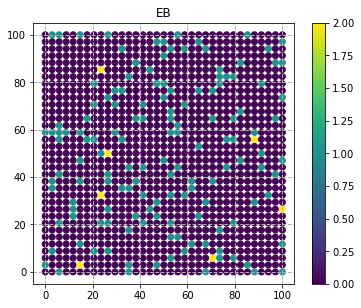

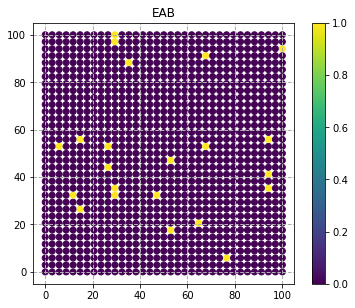

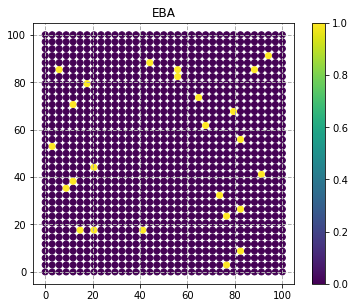

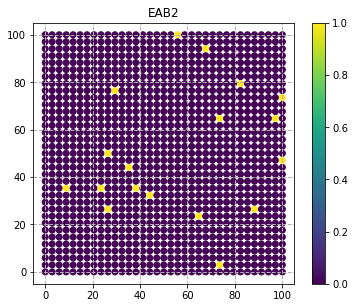

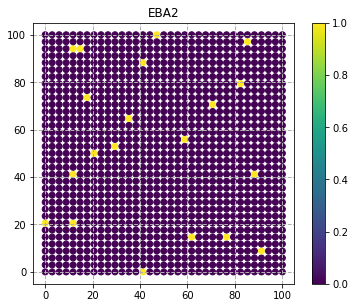

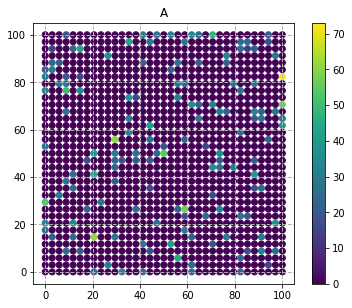

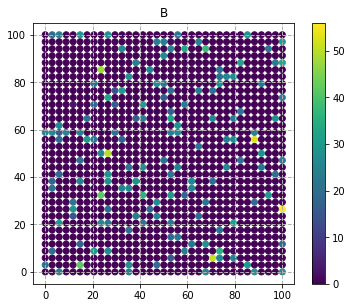

In [18]:
#for i,t in enumerate(result.get_timespan()):
    #print(i,t)
speciesList = model.get_all_species()
for s in speciesList:
    result.plot_species(s, title=s, t_ndx=9, use_matplotlib=True,)